# Cafe Sales Data — Exploratory Data Analysis

This project performs a comprehensive **Exploratory Data Analysis (EDA)** on a cafe’s transactional dataset to uncover patterns in **sales performance, customer preferences, and operational behavior**.

The dataset captures daily transactions, including **items sold, quantity, pricing, payment methods, and timestamps**, offering a rich view of café operations.

Using Python libraries like **pandas, seaborn, and matplotlib**, the analysis covers:
- Data cleaning and preprocessing
- Feature engineering
- Univariate, Bivariate and multivariate analysis
- Outlier detection and treatment
- Business insights for product, pricing, and staffing optimization

### Project Goals

The main objectives of this analysis are to:

- **Evaluate overall sales performance** by analyzing revenue, quantity sold, and transaction count over time.
- **Identify top-selling items** and assess their contribution to total revenue.
- **Compare weekday vs weekend sales trends** to understand customer flow and behavioral patterns.
- **Explore seasonal and monthly variations** in demand to uncover time-based insights.
- **Detect outliers and inconsistencies** in the dataset to ensure data quality and reliable conclusions.
- **Deliver data-driven recommendations** to support business decisions around product offerings, pricing, and staffing.

## Dataset Information

- **Name**: Cafe Sales – Dirty Data for Cleaning Training
- **Rows**: 10,000
- **Columns**: Transaction ID, Transaction Date, Item, Quantity, Price per Unit, Total Spent, Payment Method, Location.
- **Source**: Kaggle

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2. Load Dataset

In [3]:
raw_df=pd.read_csv("C:/Users/Simitha/Downloads/dirty_cafe_sales.csv")
raw_df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2,4,Credit Card,Takeaway,08-09-2023
1,TXN_4977031,Cake,4,3,12,Cash,In-store,16-05-2023
2,TXN_4271903,Cookie,4,1,ERROR,Credit Card,In-store,19-07-2023
3,TXN_7034554,Salad,2,5,10,UNKNOWN,UNKNOWN,27-04-2023
4,TXN_3160411,Coffee,2,2,4,Digital Wallet,In-store,11-06-2023
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2,4,NaN,UNKNOWN,30-08-2023
9996,TXN_9659401,NaN,3,NaN,3,Digital Wallet,NaN,02-06-2023
9997,TXN_5255387,Coffee,4,2,8,Digital Wallet,NaN,02-03-2023
9998,TXN_7695629,Cookie,3,NaN,3,Digital Wallet,NaN,02-12-2023


## 3. Data Preview

In [4]:
print(f"Number of rows: {raw_df.shape[0]}, Number of columns: {raw_df.shape[1]}")

Number of rows: 10000, Number of columns: 8


In [5]:
raw_df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2,4,Credit Card,Takeaway,08-09-2023
1,TXN_4977031,Cake,4,3,12,Cash,In-store,16-05-2023
2,TXN_4271903,Cookie,4,1,ERROR,Credit Card,In-store,19-07-2023
3,TXN_7034554,Salad,2,5,10,UNKNOWN,UNKNOWN,27-04-2023
4,TXN_3160411,Coffee,2,2,4,Digital Wallet,In-store,11-06-2023


In [6]:
raw_df.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2,4,NaN,UNKNOWN,30-08-2023
9996,TXN_9659401,NaN,3,NaN,3,Digital Wallet,NaN,02-06-2023
9997,TXN_5255387,Coffee,4,2,8,Digital Wallet,NaN,02-03-2023
9998,TXN_7695629,Cookie,3,NaN,3,Digital Wallet,NaN,02-12-2023
9999,TXN_6170729,Sandwich,3,4,12,Cash,In-store,07-11-2023


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [8]:
raw_df.describe(include="all").T

,count,unique,top,freq
Transaction ID,10000,10000,TXN_9226047,1
Item,9667,10,Juice,1171
Quantity,9862,7,5,2013
Price Per Unit,9821,8,3,2429
Total Spent,9827,19,6,979
Payment Method,7421,5,Digital Wallet,2291
Location,6735,4,Takeaway,3022
Transaction Date,9841,367,UNKNOWN,159


In [9]:
raw_df.nunique()

Transaction ID      10000
Item                   10
Quantity                7
Price Per Unit          8
Total Spent            19
Payment Method          5
Location                4
Transaction Date      367
dtype: int64

In [10]:
raw_df.duplicated().sum()

np.int64(0)

### Initial Dataset Overview

- The dataset contains **10,000 records across 8 columns**, representing individual transaction entries.
- **All columns are currently stored as object data types**, which may require conversion for numerical or datetime operations.
- The dataset includes the following fields: **Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, and Transaction Date**.
- Some entries appear to be **inconsistent or potentially erroneous**, warranting further validation during preprocessing.
- **Missing values are present** in a few columns — these will be explored and addressed in subsequent steps.
- **No duplicate rows were detected**, confirming that each transaction is uniquely recorded.

## 4. Data Cleaning

### Convert Data Types

In [11]:
raw_df['Quantity']=pd.to_numeric(raw_df['Quantity'], errors='coerce')
raw_df['Price Per Unit']=pd.to_numeric(raw_df['Price Per Unit'], errors='coerce')
raw_df['Total Spent']=pd.to_numeric(raw_df['Total Spent'], errors='coerce')
raw_df['Transaction Date'] = pd.to_datetime(raw_df['Transaction Date'], errors='coerce')

In [12]:
df = raw_df.copy()

### Clean Column Names

In [13]:
df.columns=df.columns.str.strip().str.replace(' ','_')

In [14]:
df.columns

Index(['Transaction_ID', 'Item', 'Quantity', 'Price_Per_Unit', 'Total_Spent',
       'Payment_Method', 'Location', 'Transaction_Date'],
      dtype='object')

In [15]:
df.rename(columns={"Location": "Order_Type"}, inplace=True)

In [16]:
df.rename(columns={"Total_Spent": "Revenue"}, inplace=True)

In [17]:
print('Column Names:',df.columns)

Column Names: Index(['Transaction_ID', 'Item', 'Quantity', 'Price_Per_Unit', 'Revenue',
       'Payment_Method', 'Order_Type', 'Transaction_Date'],
      dtype='object')


### Standardize Missing Entries

In [18]:
df.replace(['ERROR','UNKNOWN','NaN','N/A','NA','NONE'], np.nan, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price_Per_Unit    9467 non-null   float64       
 4   Revenue           9498 non-null   float64       
 5   Payment_Method    6822 non-null   object        
 6   Order_Type        6039 non-null   object        
 7   Transaction_Date  3742 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


### Detect Missing Values  

In [20]:
df.isnull().sum()

Transaction_ID         0
Item                 969
Quantity             479
Price_Per_Unit       533
Revenue              502
Payment_Method      3178
Order_Type          3961
Transaction_Date    6258
dtype: int64

In [21]:
print("Missing Values Before Cleaning:")
df.isnull().sum()/(len(df))*100

Missing Values Before Cleaning:


Transaction_ID       0.00
Item                 9.69
Quantity             4.79
Price_Per_Unit       5.33
Revenue              5.02
Payment_Method      31.78
Order_Type          39.61
Transaction_Date    62.58
dtype: float64

### Handling Missing Values

#### For Categorical Columns

In [22]:
df['Payment_Method'].fillna(df['Payment_Method'].mode()[0], inplace=True)

In [23]:
df['Order_Type'].fillna(df['Order_Type'].mode()[0], inplace=True)

In [24]:
df['Item'].fillna(df['Item'].mode()[0], inplace=True)

#### For Numeric Columns

In [25]:
df['Price_Per_Unit'].fillna(df['Price_Per_Unit'].median(), inplace=True)

In [26]:
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)

#### Recalculate Revenue

In [27]:
df['Revenue']=df['Quantity'] * df['Price_Per_Unit']

#### Handle Missing Dates
##### Lets fill null values of the date based on nearby records.

In [28]:
df['Transaction_Date']=df['Transaction_Date'].fillna(method='bfill')

#### Check Missing Values

In [29]:
cleaned_missing_values = df.isnull().sum()

In [30]:
print('Missing values after cleaning:')
print(cleaned_missing_values)

Missing values after cleaning:
Transaction_ID      0
Item                0
Quantity            0
Price_Per_Unit      0
Revenue             0
Payment_Method      0
Order_Type          0
Transaction_Date    0
dtype: int64


### Outlier Detection Using the IQR Method

To identify outliers in the numerical columns — **Quantity**, **Price_Per_Unit**, and **Revenue** — we apply the **Interquartile Range (IQR) technique**. Any data point falling below **Q1 − 1.5 × IQR** or above **Q3 + 1.5 × IQR** is considered an outlier and flagged for further review.

In [31]:
num_cols = ['Quantity', 'Price_Per_Unit', 'Revenue']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")

Quantity: 0 outliers
Price_Per_Unit: 0 outliers
Revenue: 240 outliers


Outliers in the numerical columns are identified using the **IQR approach** and then **capped at their respective lower and upper bounds** to reduce distortion.  
For each column, a **new version with capped values** is created, and **side-by-side boxplots** are used to visually compare the data distribution **before and after capping**.

Revenue: 240 outliers capped


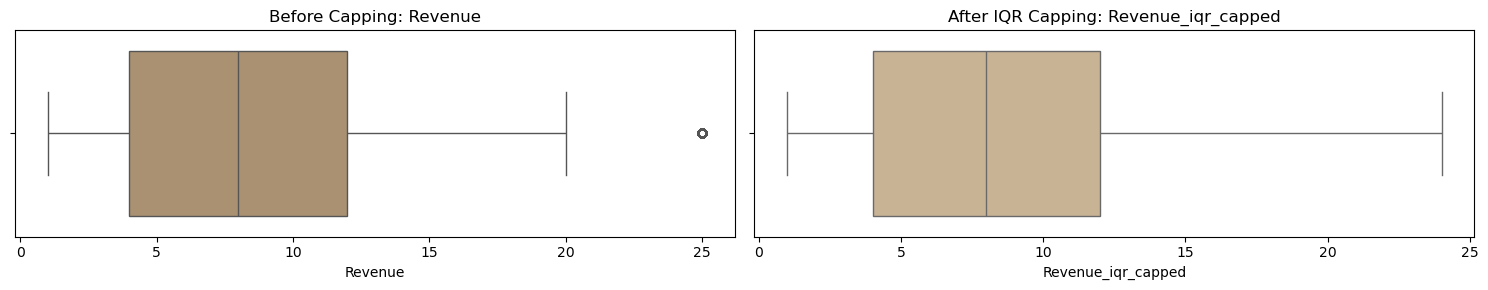

In [32]:
col = 'Revenue' 

# Print how many outliers
print(f"{col}: {outliers.shape[0]} outliers capped")

# Cap and create new column
capped_col = f"{col}_iqr_capped"
df[capped_col] = df[col].clip(lower=lower, upper=upper)

# Plot before and after
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
sns.boxplot(x=df[col], ax=axes[0], color='#B29268')
axes[0].set_title(f"Before Capping: {col}")
sns.boxplot(x=df[capped_col], ax=axes[1], color='#D2B48C')
axes[1].set_title(f"After IQR Capping: {capped_col}")
plt.tight_layout()
plt.show()

df['Revenue'] = df[capped_col]    # Replace original column with capped values

Initial analysis revealed outliers were detected in all numerical columns. However, **Quantity** and **Price_Per_Unit** showed no significant anomalies, while **Revenue** exhibited clear outliers.

To mitigate their impact, the **IQR capping technique** was applied to the **Revenue column**. Values falling outside the acceptable range were replaced with the nearest boundary limits, minimizing distortion from extreme entries.

**Boxplot comparisons before and after capping** highlight the improvement:
- The distribution became more compact and uniform.
- Outliers were effectively removed.
- The column is now better prepared for **accurate analysis and predictive modeling**.

### Detect Duplicates

In [33]:
df.drop_duplicates(inplace=True)
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


### Data Cleaning: Completed

In [34]:
df.head(20)

,Transaction_ID,Item,Quantity,Price_Per_Unit,Revenue,Payment_Method,Order_Type,Transaction_Date,Revenue_iqr_capped
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-08-09,4.0
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-11-06,12.0
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-11-06,4.0
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-11-06,10.0
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-11-06,4.0
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Takeaway,2023-06-10,20.0
6,TXN_4433211,Juice,3.0,3.0,9.0,Digital Wallet,Takeaway,2023-06-10,9.0
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Takeaway,2023-07-11,16.0
8,TXN_4717867,Juice,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-07-11,15.0
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Digital Wallet,In-store,2023-07-11,20.0


## 5. Compare Data Distribution (Before vs After Cleaning)

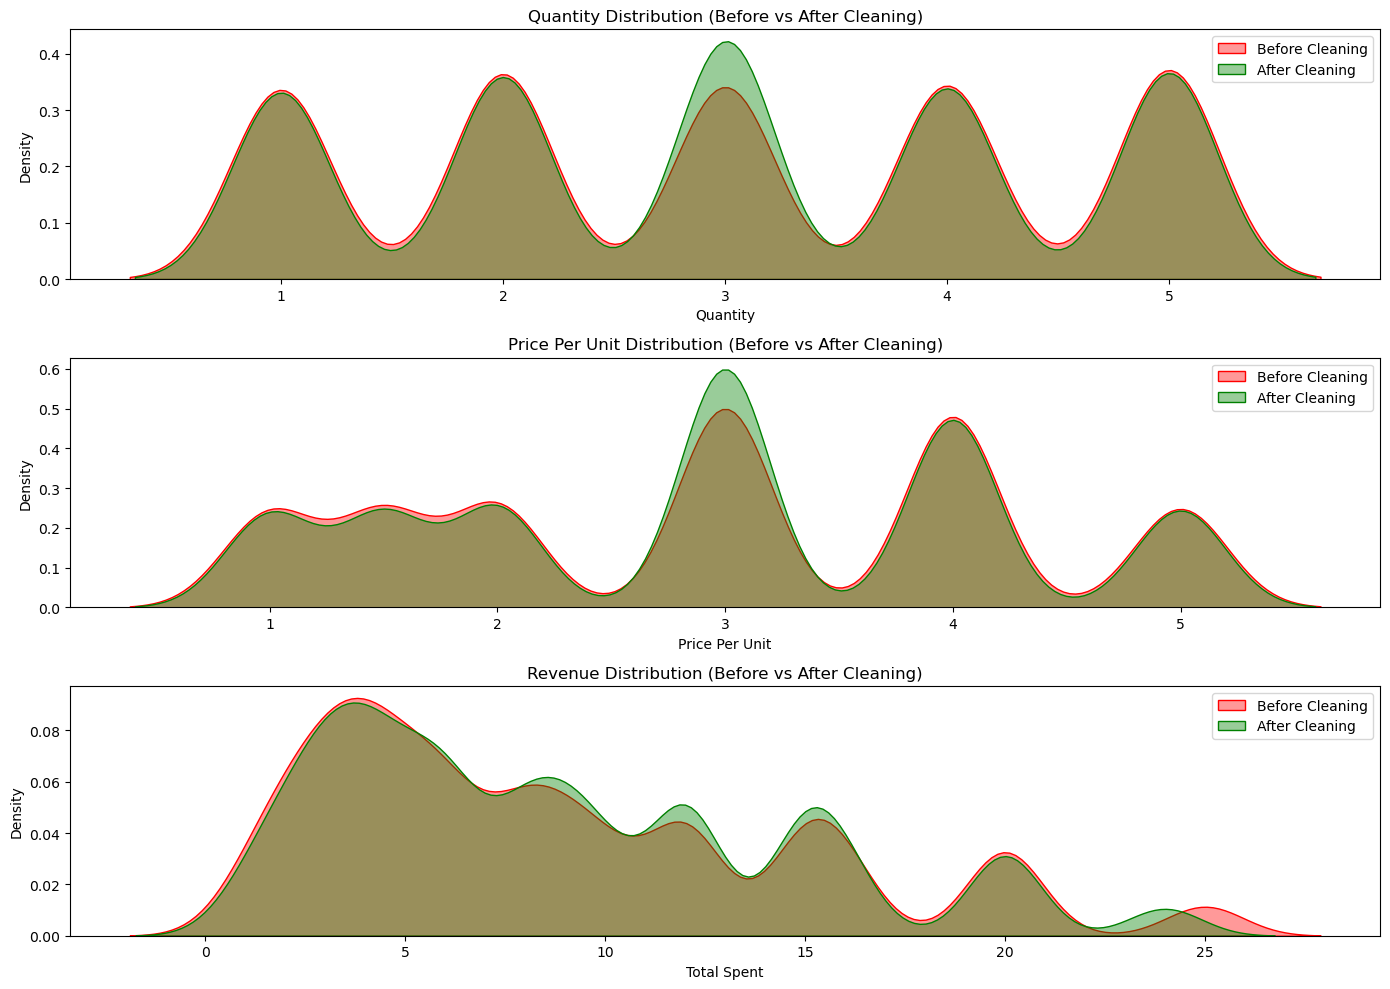

In [35]:
plt.figure(figsize=(14,10))

# Quantity Distribution
plt.subplot(3,1,1)
sns.kdeplot(raw_df['Quantity'], color='red', label='Before Cleaning', fill=True, alpha=0.4)
sns.kdeplot(df['Quantity'], color='green', label='After Cleaning', fill=True, alpha=0.4)
plt.title('Quantity Distribution (Before vs After Cleaning)')
plt.legend()

# Price Per Unit Distribution
plt.subplot(3,1,2)
sns.kdeplot(raw_df['Price Per Unit'], color='red', label='Before Cleaning', fill=True, alpha=0.4)
sns.kdeplot(df['Price_Per_Unit'], color='green', label='After Cleaning', fill=True, alpha=0.4)
plt.title('Price Per Unit Distribution (Before vs After Cleaning)')
plt.legend()

# Revenue Distribution
plt.subplot(3,1,3)
sns.kdeplot(raw_df['Total Spent'], color='red', label='Before Cleaning', fill=True, alpha=0.4)
sns.kdeplot(df['Revenue'], color='green', label='After Cleaning', fill=True, alpha=0.4)
plt.title('Revenue Distribution (Before vs After Cleaning)')
plt.legend()

plt.tight_layout()
plt.show()

### Observations

1. **Quantity and Price Per Unit distributions** remained unchanged after cleaning — both KDE curves overlap perfectly, indicating no outliers or inconsistencies were present.
2. In contrast, the **Revenue distribution** showed a noticeable improvement post-cleaning.
3. The **density peak around lower values** was corrected, resulting in a smoother and more balanced distribution.
4. **Inconsistencies and outliers** were effectively removed, especially in the Revenue column, enhancing data reliability.
5. Overall, the cleaning process significantly improved **data quality**, making the dataset more suitable for accurate analysis and modeling.

## 6. Missing Values Comparison


📊 Missing Values Comparison:
                    Before Cleaning (%)  After Cleaning (%)
Item                               3.33                 0.0
Location                          32.65                 NaN
Order_Type                          NaN                 0.0
Payment Method                    25.79                 NaN
Payment_Method                      NaN                 0.0
Price Per Unit                     5.33                 NaN
Price_Per_Unit                      NaN                 0.0
Quantity                           4.79                 0.0
Revenue                             NaN                 0.0
Revenue_iqr_capped                  NaN                 0.0
Total Spent                        5.02                 NaN
Transaction Date                  62.58                 NaN
Transaction ID                     0.00                 NaN
Transaction_Date                    NaN                 0.0
Transaction_ID                      NaN                 0.0


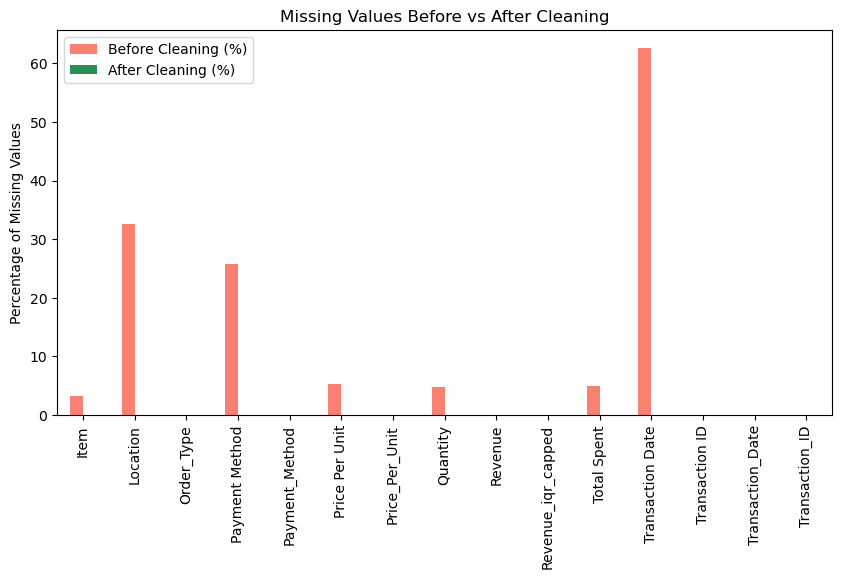

In [36]:
missing_before = raw_df.isnull().mean() * 100
missing_after = df.isnull().mean() * 100

missing_compare = pd.DataFrame({
    'Before Cleaning (%)': missing_before,
    'After Cleaning (%)': missing_after
}).round(2)

print("\n📊 Missing Values Comparison:")
print(missing_compare)

# Bar plot comparison
missing_compare.plot(kind='bar', figsize=(10,5), color=['salmon','seagreen'])
plt.title('Missing Values Before vs After Cleaning')
plt.ylabel('Percentage of Missing Values')
plt.show()

### Observations

1. **Before cleaning**, significant missing values (ranging from 3.3% to 62.6%) were present across multiple columns.  
2. **Transaction Date and Location** had the highest levels of missingness, affecting **62.6%** and **32.7%** of their entries, respectively.  
3. Post-cleaning, **all missing values were reduced to 0%**, confirming that imputation and correction techniques were effectively applied.  
4. This comprehensive treatment enhances **dataset completeness**, ensuring that subsequent analysis and insights are based on solid and uninterrupted data.

### Data Cleaning Summary

- **Inconsistent entries** such as `"ERROR"` and `"UNKNOWN"` were identified and corrected to ensure data integrity.
- **All columns were converted to their appropriate data types**, enabling accurate analysis and smoother downstream processing.
- **Missing values** of the dataset and were handled using **column-specific imputation strategies** based on data type.
- **Outliers were detected and capped using the IQR method**, resulting in a more reliable and well-structured dataset for further exploration and modeling.

## 7. Feature Engineering

In [37]:
df['Year']=df['Transaction_Date'].dt.year
df['Month_Name']=df['Transaction_Date'].dt.strftime('%B')
df['Day_Name']=df['Transaction_Date'].dt.day_name()
df['Week']=df['Transaction_Date'].dt.isocalendar().week
df['Is_Weekend']=df['Day_Name'].isin(['Saturday','Sunday']).astype(int)

In [38]:
df.head(10)

,Transaction_ID,Item,Quantity,Price_Per_Unit,Revenue,Payment_Method,Order_Type,Transaction_Date,Revenue_iqr_capped,Year,Month_Name,Day_Name,Week,Is_Weekend
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-08-09,4.0,2023,August,Wednesday,32,0
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-11-06,12.0,2023,November,Monday,45,0
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-11-06,4.0,2023,November,Monday,45,0
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-11-06,10.0,2023,November,Monday,45,0
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-11-06,4.0,2023,November,Monday,45,0
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Takeaway,2023-06-10,20.0,2023,June,Saturday,23,1
6,TXN_4433211,Juice,3.0,3.0,9.0,Digital Wallet,Takeaway,2023-06-10,9.0,2023,June,Saturday,23,1
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Takeaway,2023-07-11,16.0,2023,July,Tuesday,28,0
8,TXN_4717867,Juice,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-07-11,15.0,2023,July,Tuesday,28,0
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Digital Wallet,In-store,2023-07-11,20.0,2023,July,Tuesday,28,0


### Feature Engineering Summary

- **Time-based features** such as **Day, Month, Week, and Is_Weekend** were extracted from the `Transaction_Date` column to enrich temporal analysis.
- These enhancements added analytical depth.

## 8. Save Cleaned File

In [46]:
df.to_csv("Cafe_Sales_Cleaned.csv", index=False)
print("Cleaned data saved as 'Cafe_Sales_Cleaned.csv'")

Cleaned data saved as 'Cafe_Sales_Cleaned.csv'


## 7. Exploratory Data Analysis (EDA)

### 1. Univariate Analysis (single column distributions)
#### A. Distribution of Numerical Columns:

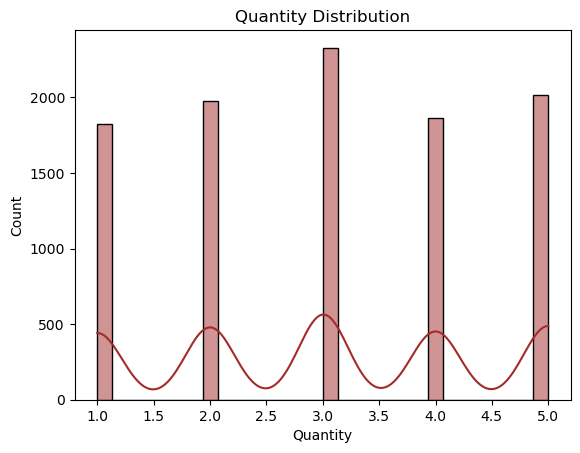

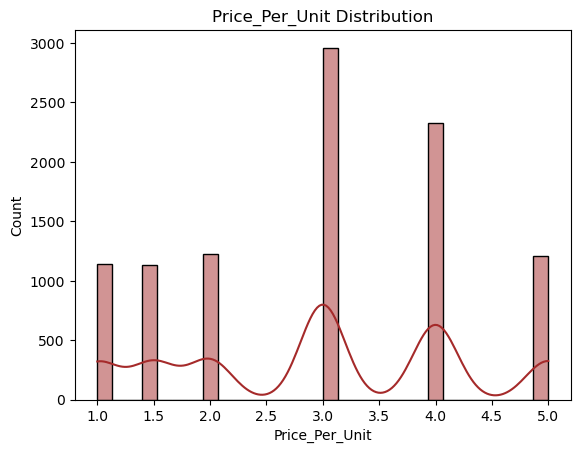

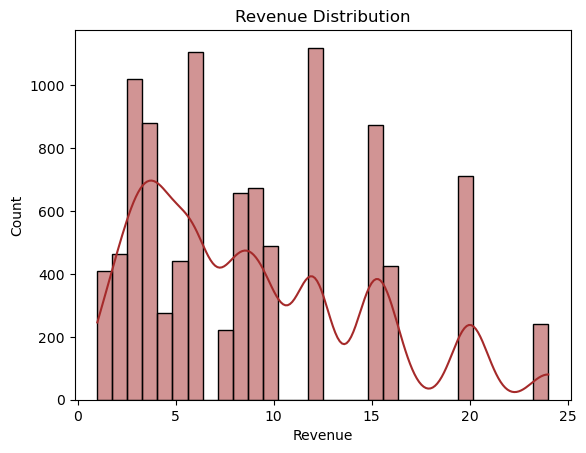

In [47]:
for col in ['Quantity','Price_Per_Unit','Revenue']:
    sns.histplot(df[col], bins=30, kde=True, color='brown')
    plt.title(f'{col} Distribution')
    plt.show()

### Observations

1. **Quantity Distribution**  
   - The distribution is **approximately symmetrical** overall, lacking a significant tail on either side.
   - The distribution is highly **multimodal** with distinct peaks at the integer values: 1.0,2.0,3.0,4.0, and 5.0.
   - Near Uniform: The counts for the 1.0,2.0,4.0, and 5.0 quantities are very similar (around 1,800 to 2,000). The 3.0 quantity has a slightly higher count (around 2,200).

2. **Price Per Unit Distribution**  
   - Similar to Quantity, this distribution is **multimodal** with clear peaks at 1.0,1.5,2.0,3.0,4.0, and 5.0.
   - The distribution is **fairly symmetric**, centered around common price points between ₹2.5 and ₹3.5.  
   - The KDE curve shows a smooth peak, indicating consistent pricing across items.

3. **Revenue Distribution**  
   - The histogram reveals a **bimodal pattern**, with two distinct peaks — one around ₹5–10 and another near ₹15.  
   - The distribution is generally **positively skewed**. The bulk of the data is concentrated on the lower end (<15), and there is a longer, thinner tail extending toward higher revenue values (up to 25).
   - The data has a wide spread, ranging from near 0 up to 25. The bars decrease significantly in height after the initial cluster, indicating that very high revenue is rare.
   - No Zero Revenue: All observed revenue values are greater than zero.

#### B. Distribution of Categorical Columns:

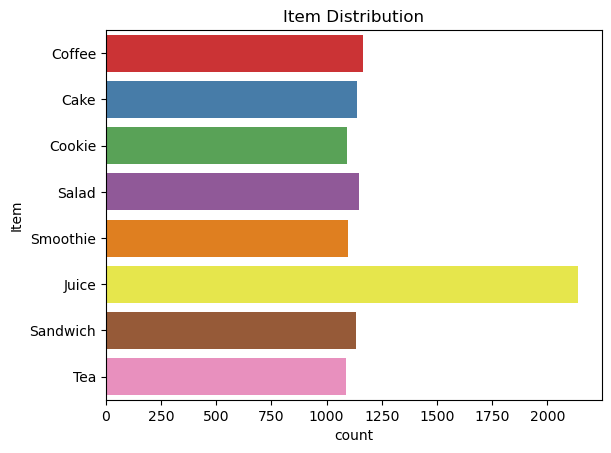

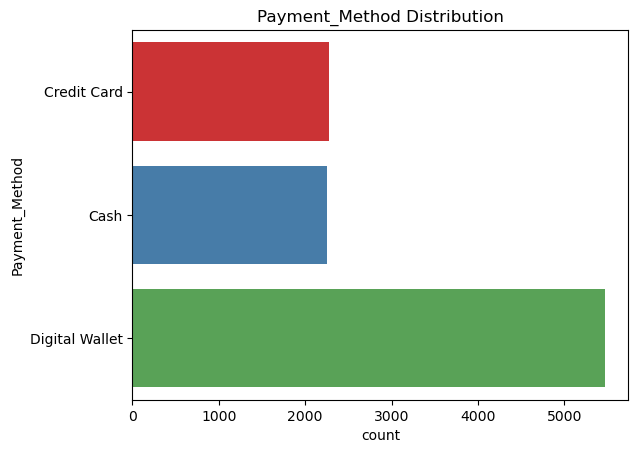

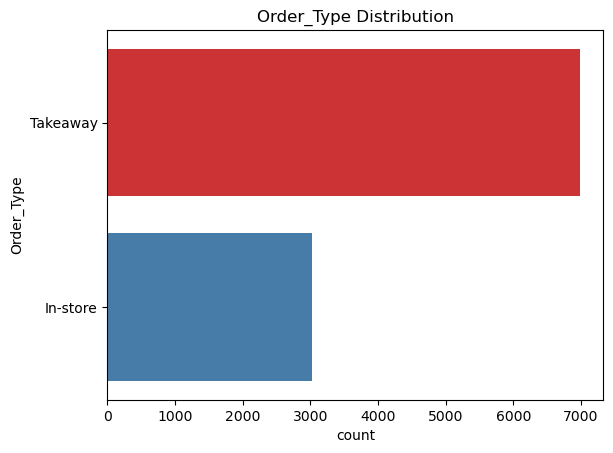

In [39]:
for col in ['Item','Payment_Method','Order_Type']:
    sns.countplot(data=df[col], palette="Set1")
    plt.title(f'{col} Distribution')
    plt.show()

### Observations
1. **Juice** is the **highest** selling item. Most people preferred **Juice**. The count is over 6,438.
2. **Digital Wallet** is the **most frequently** used payment method, accounting for approximately 5,469 transactions, highlighting a shift toward cashless convenience.
3. **Takeaway** orders dominate, with nearly 6,983 instances, suggesting that customers prefer quick service and off-premise consumption.

### 2. Bivariate Analysis (relationship between two columns)¶

#### Top Products by Revenue:

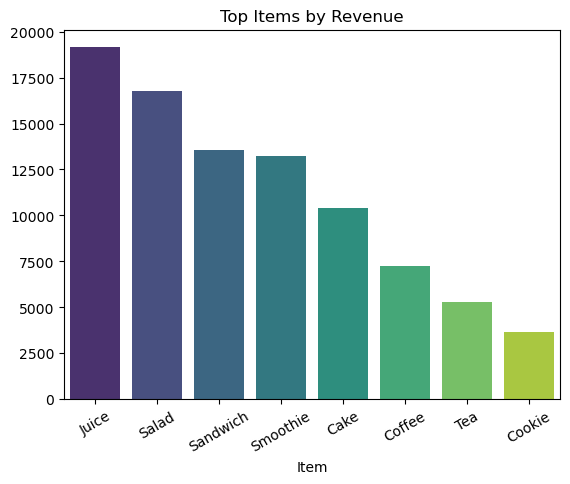

In [51]:
top_items = df.groupby('Item')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(y=top_items.values, x=top_items.index, palette='viridis')
plt.title('Top Items by Revenue')
plt.xticks(rotation=30)
plt.show()

### Observations
1. **Juice** leads all items in revenue, indicating it's the most profitable and most frequently purchased product. This could be due to high demand, favorable pricing, or strong margins.
2. **Salad and Sandwich** follow closely behind, suggesting that healthier or meal-oriented options are popular among customers.
3. **Smoothie and Cake** show moderate performance, possibly appealing to niche segments like dessert lovers or health-conscious buyers.
4. **Coffee, Tea, and Cookie** generate lower revenue, which may reflect smaller basket sizes or lower unit prices. These could be upsell opportunities rather than primary drivers.

#### Payment Method by Order Type

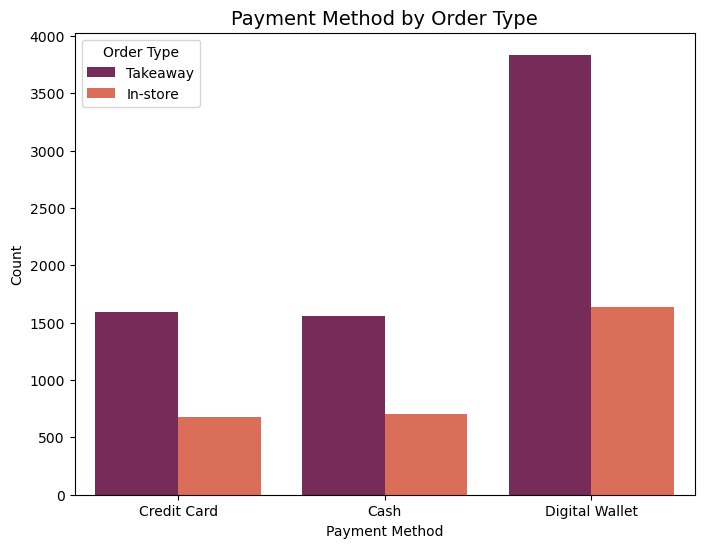

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Payment_Method', hue='Order_Type', palette='rocket')
plt.title('Payment Method by Order Type', fontsize=14)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Order Type')
plt.show()

### Observations
1. **Digital Wallets** dominate, especially for **Takeaway orders**, with nearly 3,750 transactions — more than double the usage of **Credit Card or Cash**. This suggests customers prefer fast, contactless payments when ordering to-go.
2. **Cash and Credit Card** usage is balanced, but both are significantly lower than **Digital Wallets**. Each sees around **1,500 Takeaway** and **750 In-store transactions**, indicating moderate preference across both order types.
3. **In-store payments** are more evenly distributed, but still show a strong leaning toward **Digital Wallets**, reinforcing the trend toward mobile-first payment habits.

#### Price Per Unit vs Revenue by Payment Method

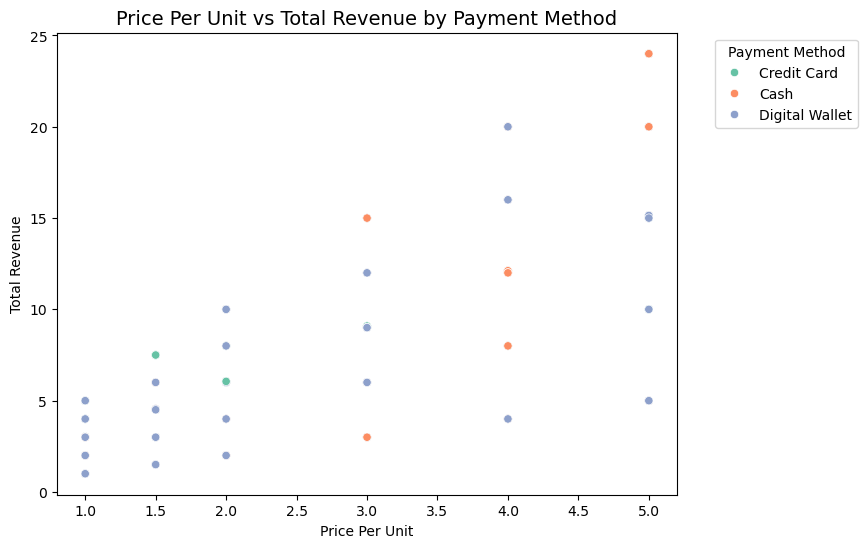

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Price_Per_Unit', y='Revenue', hue='Payment_Method', palette='Set2')
plt.title('Price Per Unit vs Total Revenue by Payment Method', fontsize=14)
plt.xlabel('Price Per Unit')
plt.ylabel('Total Revenue')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Observations
1. **Positive trend across all payment method**s: As the price per unit increases, total revenue tends to rise — indicating that higher-priced items contribute more to overall earnings, regardless of how they're paid for.
2. **Digital Wallet** leads in revenue: **Blue data points (Digital Wallet) dominate the upper-right quadrant**, showing that customers using mobile payments are purchasing higher-priced items and generating more revenue.
3. **Cash transactions** cluster at lower price points: **Orange points are more concentrated in the lower-left area**, suggesting that cash users tend to buy lower-priced items or spend less per transaction.
4. **Credit Card** usage spans mid-to-high price ranges: **Green points are scattered across moderate price levels**, indicating balanced spending behavior — possibly used for both essentials and indulgent purchases.

### 3. Multivariate Analysis (Examining multiple variables together)

#### Pairplot (Quantity, Price, Revenue)

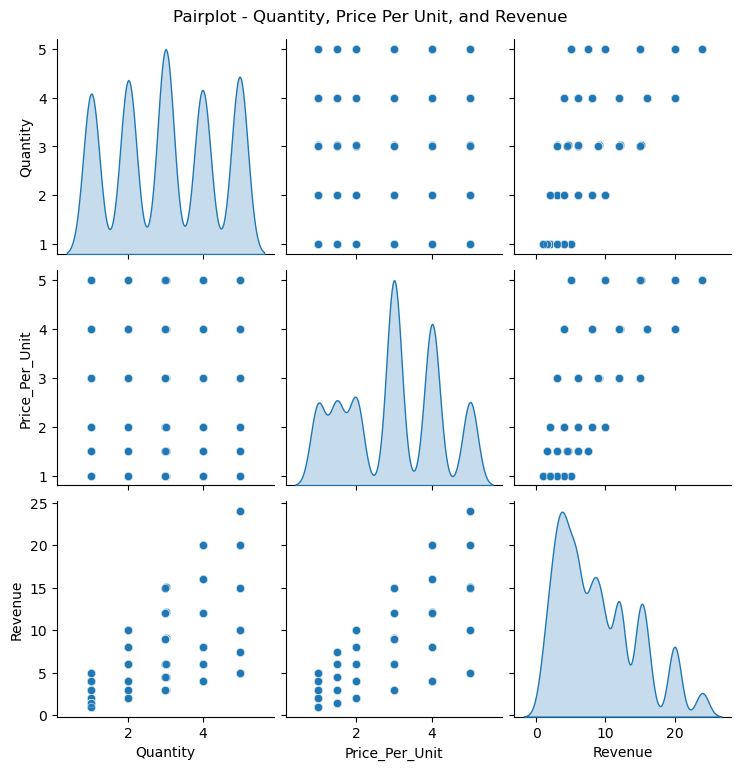

In [43]:
sns.pairplot(df[['Quantity', 'Price_Per_Unit', 'Revenue']], diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Pairplot - Quantity, Price Per Unit, and Revenue', y=1.02)
plt.show()

### Observations
1. **Quantity and Price Per Unit** show **no strong correlation** — customers buy varying amounts regardless of item price.
2. **Revenue increases** as **either Quantity or Price Per Unit rises**, confirming that both volume and pricing contribute to total spend.
3. **Revenue** has a **wide spread** — some transactions are high-value, while many are low, indicating diverse spending behavior.
4. Both **Quantity and Price Per Unit** exhibit **distinct peaks**, suggesting that certain purchase sizes and price points are more common.

### 4. Time Series Analysis (based on Transaction_Date)
#### Monthly Revenue trend

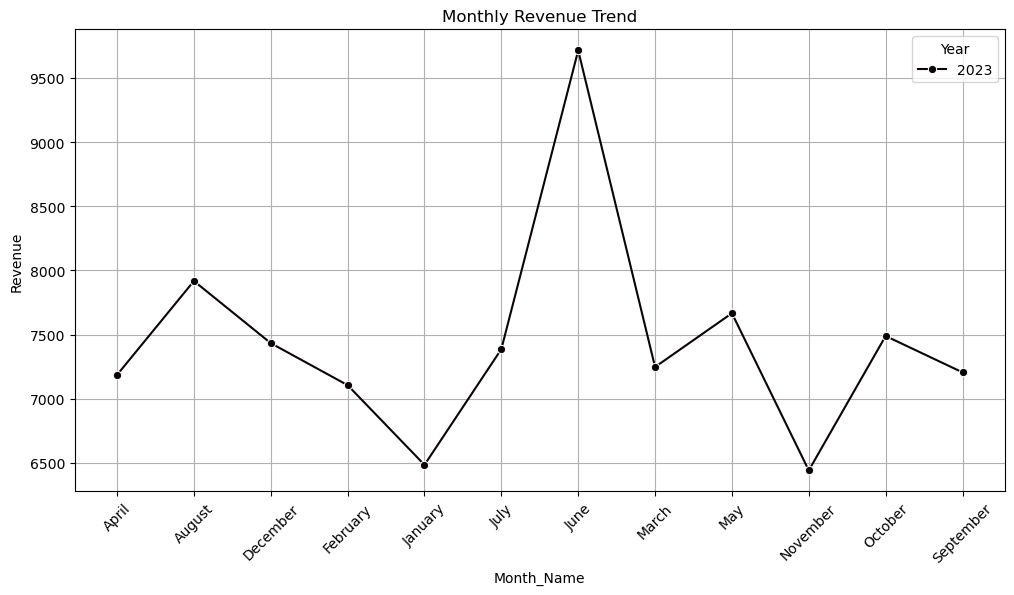

In [44]:
monthly_sales = df.groupby(["Year","Month_Name"])["Revenue"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Month_Name", y="Revenue", hue="Year", marker="o", palette="mako")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Observations

1. **June** shows the **highest revenue**, peaking above 9,500 — possibly due to seasonal demand or promotions (e.g., cold drinks, smoothies).
2. **January and November** record the **lowest revenue**, just bleow 6,500 — indicating a potential dip in customer activity.
3. Revenue **fluctuates across months**, with no consistent upward or downward trend, suggesting variable business cycles.
4. Mid-range months like **May, July, August** show **moderate performance**, useful for benchmarking future growth.
5. The drop after June’s peak could indicate post-season slowdown or reduced customer engagement.

#### Sales by Day of Week

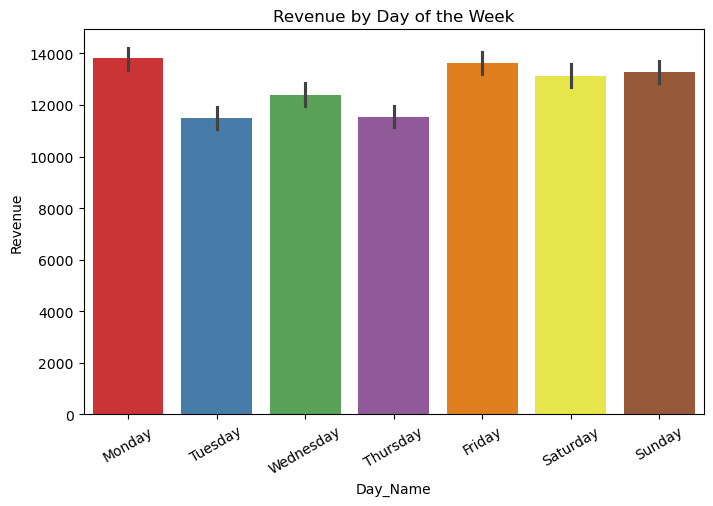

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Day_Name", y="Revenue", estimator="sum", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="Set1")
plt.title("Revenue by Day of the Week")
plt.xticks(rotation=30)
plt.show()

### Observations

1. **Monday leads in weekly revenue**, indicating strong start-of-week sales — possibly driven by routine purchases or fresh inventory.
2. **Tuesday and Thursday** show relatively **lower revenues**, indicating midweek slowdown in customer activity.
3. **Friday to Sunday** show **steady sales performance**, possibly due to weekend dining or leisure-related purchases.
4. Overall, sales remain **consistent across the week** with minor variations — no extreme dips observed.

#### Weekend vs Weekday Sales

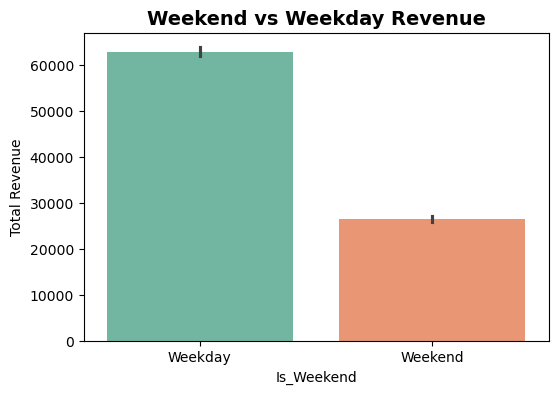

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(x='Is_Weekend', y='Revenue', data=df, estimator='sum', palette='Set2')
plt.title('Weekend vs Weekday Revenue', fontsize=14, fontweight='bold')
plt.xticks([0,1], ['Weekday','Weekend'])
plt.ylabel('Total Revenue')
plt.show()

### Observations

1. **Weekdays drive significantly higher revenue**, surpassing 60,000 — indicating that most customer activity or transactions occur from Monday to Friday.
2. **Weekend revenue is less than half of weekday earnings**, suggesting reduced footfall or limited operational hours on Saturdays and Sundays.
3. The **stark contrast** between weekday and weekend sales could inform decisions on **marketing focus, staffing levels, or promotional strategies**.

### Comparing Item Sales on Weekdays vs Weekends

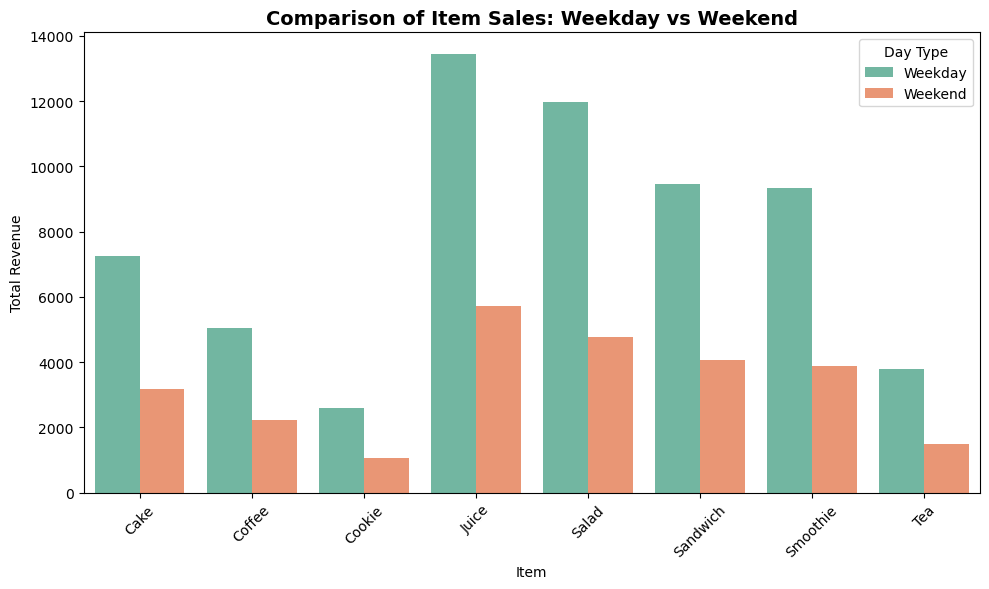

In [47]:
item_sales = df.groupby(['Item', 'Is_Weekend'])['Revenue'].sum().reset_index()
item_sales['Day_Type'] = item_sales['Is_Weekend'].map({0: 'Weekday', 1: 'Weekend'})

plt.figure(figsize=(10,6))
sns.barplot(data=item_sales, x='Item', y='Revenue', hue='Day_Type', palette='Set2')
plt.title('Comparison of Item Sales: Weekday vs Weekend', fontsize=14, fontweight='bold')
plt.xlabel('Item')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

### Observations

1. **Juice and Salad are the top-performing** items on **both weekdays and weekends**, showing strong overall demand.
2. **Weekday sales are significantly higher than weekend sales** across all items — possibly due to regular customer traffic such as office-goers or routine visitors.
3. **Cookies, Tea, and Coffee have relatively lower sales volumes**, but still show **consistent demand** patterns.
4. The sharp **weekday–weekend gap** highlights an opportunity to boost weekend performance through **targeted promotions, special offers, or adjusted staffing**.

#### Daily Sales Trend Analysis (Revenue vs Quantity vs Transactions)

In [60]:
daily_sales = df.groupby(
    by="Transaction_Date"
).agg(
        Revenue = ("Revenue", "sum"),
        Quantity = ("Quantity", "sum"),
        Transaction_Count = ("Transaction_Date", "count")
).reset_index()

In [61]:
daily_sales

,Transaction_Date,Revenue,Quantity,Transaction_Count
0,2023-01-01,489.284634,176.085390,57
1,2023-01-02,581.827329,190.113854,64
2,2023-01-03,406.642317,155.056927,61
3,2023-01-04,619.670780,223.056927,65
4,2023-01-05,415.113854,139.028463,48
...,...,...,...,...
139,2023-12-08,771.528463,248.028463,80
140,2023-12-09,684.327329,233.113854,84
141,2023-12-10,389.085390,136.028463,51
142,2023-12-11,610.526573,214.142317,72


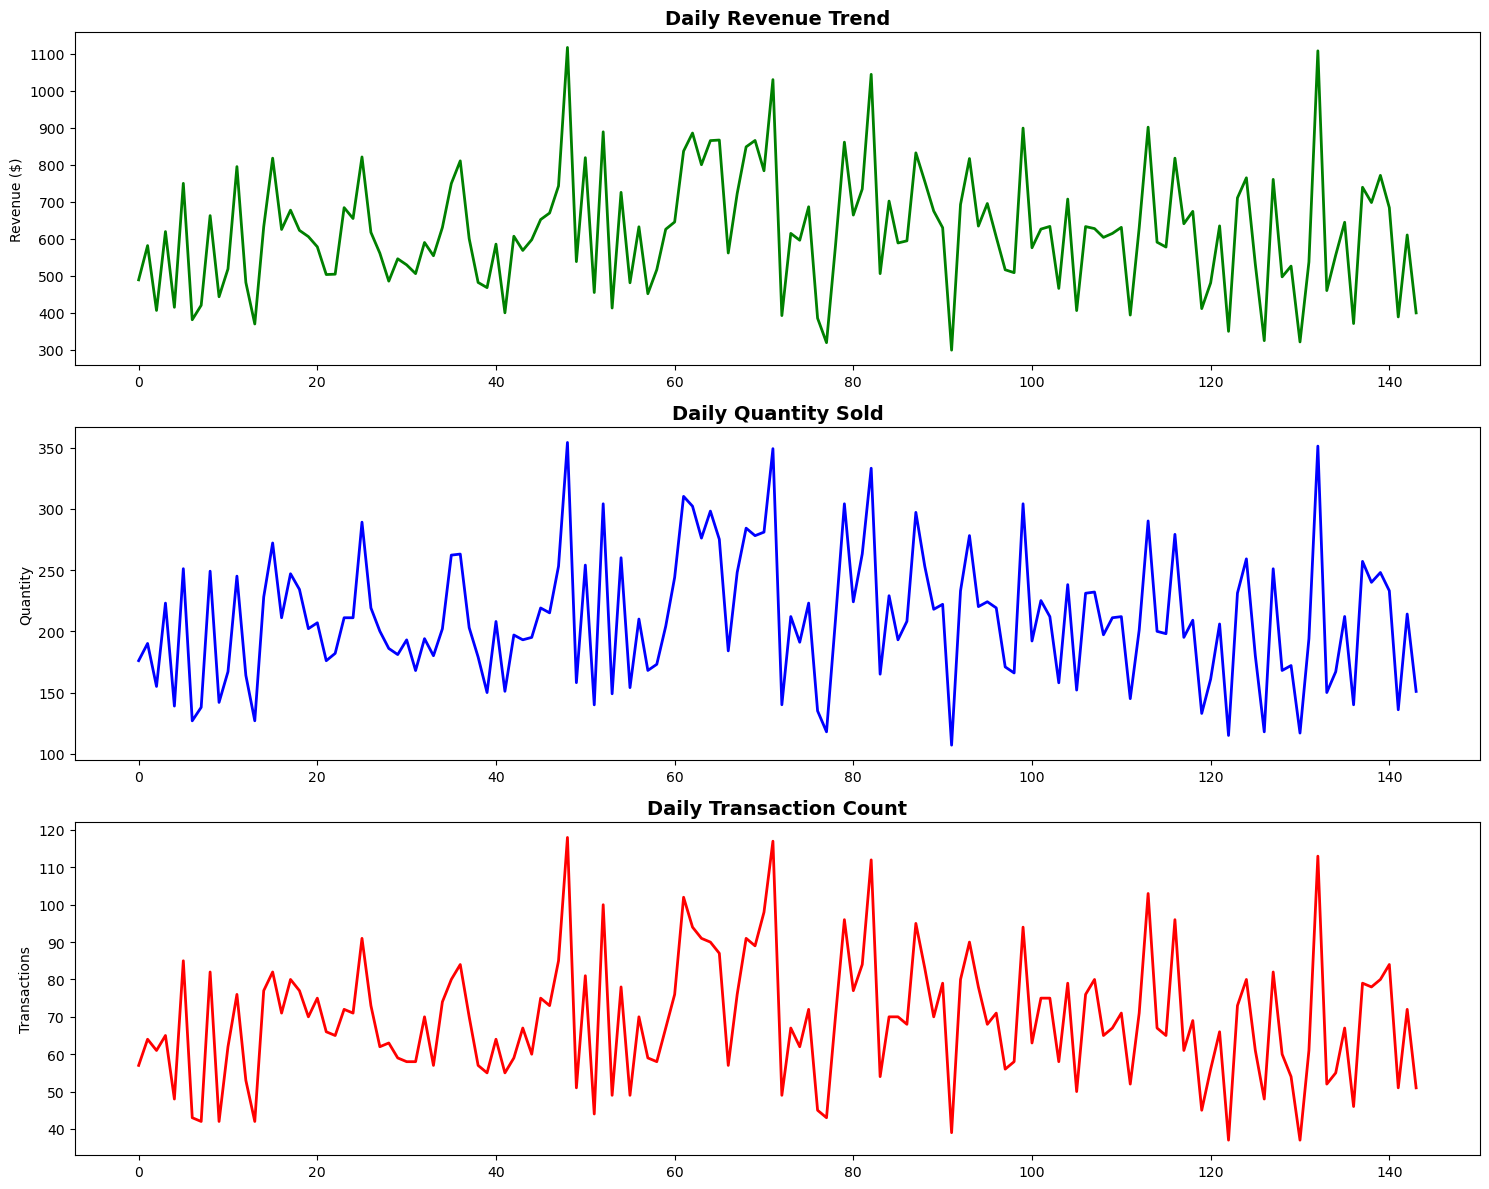

In [62]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

daily_sales['Revenue'].plot(ax=axes[0], color='green', linewidth=2)
axes[0].set_title('Daily Revenue Trend', fontsize=14, fontweight="bold")
axes[0].set_ylabel('Revenue ($)')

daily_sales['Quantity'].plot(ax=axes[1], color='blue', linewidth=2)
axes[1].set_title('Daily Quantity Sold', fontsize=14, fontweight="bold")
axes[1].set_ylabel('Quantity')

daily_sales['Transaction_Count'].plot(ax=axes[2], color='red', linewidth=2)
axes[2].set_title('Daily Transaction Count', fontsize=14, fontweight="bold")
axes[2].set_ylabel('Transactions')

plt.tight_layout()
plt.show()

### Observations

1. **Sales, transactions, and revenue fluctuate sharply** day-to-day, showing irregular demand patterns.
2. **Peaks above 300 units and dips below 150** highlight inconsistent customer traffic.
3. **Transaction count mirrors this volatility**, often exceeding 100 but occasionally falling below 60 — suggesting inconsistent customer activity.
4. **Revenue aligns closely** with sales and transaction spikes, confirming their interdependence.
5. **There’s no clear long-term trend**, suggesting stable but variable performance.
6. These insights can guide better **inventory, staffing, and promotional strategies** to handle daily demand variations efficiently.

#### 5. Correlation Analysis (numerical variables)

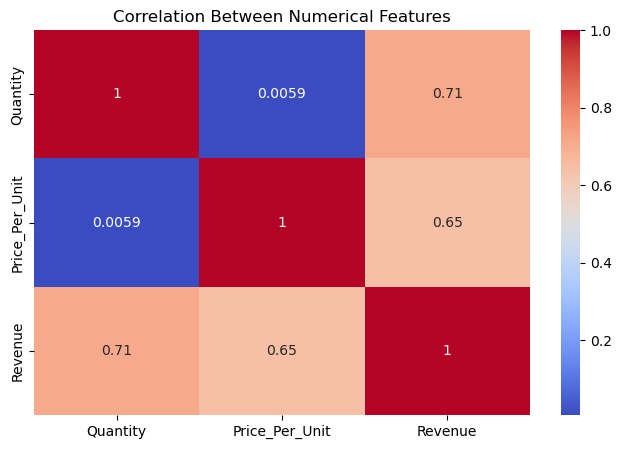

In [63]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Quantity','Price_Per_Unit','Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

### Observations

1. **Quantity and Revenue** show a **strong positive correlation** (0.71), indicating that higher quantities sold tend to drive higher revenue.
2. **Price Per Unit and Revenue** also display a **moderate positive correlation** (0.65), this suggests that higher unit prices also contribute significantly to higher total revenue.
3. **Quantity and Price Per Unit** have a **weak correlation** (0.0059), meaning purchase volume is largely independent of item price.


## 8. Insights & Conclusions

In [64]:
# --- KPI 1: Total Revenue ---
total_revenue = df['Revenue'].sum()

# --- KPI 2: Total Transactions ---
total_transactions = df['Transaction_ID'].nunique()

# --- KPI 3: Unique Items Sold ---
unique_items_sold = df['Item'].nunique()

# --- KPI 5: Average Basket Size ---
total_quantity_sold = df['Quantity'].sum()

# --- KPI 5: Average Basket Size ---
# Basket size = Avg number of items per transaction
basket_sizes = df.groupby('Transaction_ID')['Quantity'].sum()
avg_basket_size = basket_sizes.mean()

# --- KPI 6: Top-Selling Category ---
top_category = df.groupby('Item')['Quantity'].sum().idxmax()

# --- Output All KPIs ---
print("Total Revenue: ${:,.2f}".format(total_revenue))
print("Total Transactions:", total_transactions)
print("Unique Items Sold:", unique_items_sold)
print("Total Quantity Sold:", total_quantity_sold)
print("Average Basket Size: {:.2f} items/transaction".format(avg_basket_size))
print("Top-Selling Category:", top_category)

Total Revenue: $89,281.26
Total Transactions: 10000
Unique Items Sold: 8
Total Quantity Sold: 30284.633967020272
Average Basket Size: 3.03 items/transaction
Top-Selling Category: Juice


In [65]:
juice_count = df[df['Item'] == 'Juice']['Quantity'].sum()
print(f"Total units of Juice sold: {juice_count}")
digital_wallet_count = df[df['Payment_Method'] == 'Digital Wallet'].shape[0]
print(f"Digital Wallet was used {digital_wallet_count} times.")
takeaway_count = df[df['Order_Type'] == 'Takeaway'].shape[0]
print(f"Takeaway orders: {takeaway_count}")

Total units of Juice sold: 6438.017120050414
Digital Wallet was used 5469 times.
Takeaway orders: 6983


## Key Insights from Cafe Sales EDA

### 1️. Data Overview
- Total records analyzed: 10,000  
- Missing values handled successfully and data types corrected.  
- Feature engineering created additional time-based insights (Month, Week, Weekend).

### 2️. Sales Performance
- **Juice, Salad and Sandwich** are the top-selling products.  
- **Juice** alone contributes the majority of revenue.  

### 3️. Payment & Order Trends
- **Digital Wallet** dominate payment methods.  
- **Takeaway** orders slightly exceed **In-store** orders.  

### 4️. Time-based Insights
- **June** recorded peak revenue, while **January and November** saw the lowest, indicating seasonal variation.
- **Weekdays outperform weekends**, with **Monday** leading in revenue and midweek dips on **Tuesday and Thursday**.
- **Takeaway orders** slightly exceed **in-store orders**, suggesting a preference for off-premise dining.
- **Juice and Salad** are top sellers across all days; weekday sales dominate overall, highlighting an opportunity to boost weekend performance.
  
### 5. Correlation Insights 
- **Quantity and Revenue** show a strong positive link (0.71), confirming that higher sales volume drives revenue.
- **Price Per Unit and Revenue** have a moderate correlation (0.65), indicating pricing also impacts revenue, but less than quantity.
- **Quantity and Price Per Unit** are nearly uncorrelated (0.006), suggesting purchase volume is independent of item price.

### Conclusion

This exploratory analysis of cafe sales data uncovers meaningful patterns in **product performance**, **customer behavior**, and **revenue dynamics**.  
The EDA highlights **top-selling items**, **seasonal and daily sales trends**, and **preferred payment methods**, offering a strong foundation for data-driven decisions.  
These insights can inform **inventory planning**, **pricing strategies**, **staffing adjustments**, and **targeted promotions** — especially to enhance weekend engagement and maximize revenue from high-performing products.

## 9. Final Business Recommendations - Cafe Sales Analysis

1. **Optimize Inventory & Staffing**
   - Boost inventory and staff coverage during **peak months (June)** and **busy weekdays (especially Mondays)**.
   - Scale down during **low-revenue periods** like January and November to reduce operational costs.

2. **Enhance Weekend Engagement**
   - Launch **targeted weekend promotions** to close the weekday–weekend revenue gap.
   - Feature top-performing items like **Juice and Salad** in combo offers or limited-time deals.
3. **Leverage Payment Preferences**
   - Promote **Digital Wallets** with cashback or loyalty incentives to align with customer payment habits.

4. **Refine Product Strategy**
   - Prioritize stocking and marketing of **high-revenue items** (Juice, Salad, Sandwich).
   - Monitor low-performing items for potential repositioning or bundling.

5. **Use Correlation Insights for Forecasting**
   - Focus on **quantity-driven revenue strategies**, as volume has a stronger impact than price.
   - Apply these insights to guide **pricing models, demand forecasts**, and **sales targets**.

6. **Time-Based Promotions**
   - Introduce **midweek offers** (Tuesday-Thursday) to counteract sales dips.
   - Align seasonal campaigns with **high-performing months** to maximize impact.